In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\aacjp\OneDrive\googleplaystore.csv')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [2]:
F = df.drop(['App', 'Category', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver'], axis='columns')
F.head(5)

,Rating,Reviews
0,4.1,159
1,3.9,967
2,4.7,87510
3,4.5,215644
4,4.3,967


In [3]:
G = F.head(6000)

In [4]:
G['Rating'].fillna((G['Rating'].mean()), inplace=True)

C:\Users\aacjp\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
X = G.drop(['Rating'],axis='columns')
X.head(5)

,Reviews
0,159
1,967
2,87510
3,215644
4,967


In [7]:
y = G.drop(['Reviews'],axis='columns')
y.head(5)

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3


In [8]:
from sklearn.cluster import KMeans
import numpy as np
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(y.head(6000))
y_predicted

array([0, 3, 1, ..., 3, 0, 3])

In [9]:
km.labels_

array([0, 3, 1, ..., 3, 0, 3])

In [10]:
G['cluster']=y_predicted
G.head()

C:\Users\aacjp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rating,Reviews,cluster
0,4.1,159,0
1,3.9,967,3
2,4.7,87510,1
3,4.5,215644,1
4,4.3,967,0


In [11]:
km.cluster_centers_

array([[4.18869841],
       [4.54953524],
       [2.74947368],
       [3.69655172]])

Text(0, 0.5, 'Rating')

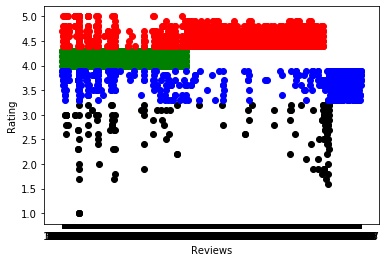

In [12]:
G1 = G[G.cluster==0]
G2 = G[G.cluster==1]
G3 = G[G.cluster==2]
G4 = G[G.cluster==3]

plt.scatter(G1.Reviews,G1['Rating'],color='green')
plt.scatter(G2.Reviews,G2['Rating'],color='red')
plt.scatter(G3.Reviews,G3['Rating'],color='black')
plt.scatter(G4.Reviews,G4['Rating'],color='blue')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Reviews')
plt.ylabel('Rating')
#plt.legend()

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(G[['Rating']])
G['Rating'] = scaler.transform(G[['Rating']])

scaler.fit(G[['Reviews']])
G['Reviews'] = scaler.transform(G[['Reviews']])
G.head(5)

C:\Users\aacjp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\aacjp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rating,Reviews,cluster
0,0.775,0.000002,0
1,0.725,0.000012,3
2,0.925,0.001120,1
3,0.875,0.002759,1
4,0.825,0.000012,0


In [14]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(y.head(6000))
y_predicted

array([3, 0, 1, ..., 0, 3, 0])

In [15]:
km.labels_

array([3, 0, 1, ..., 0, 3, 0])

In [16]:
G['cluster']=y_predicted
G.head()

C:\Users\aacjp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rating,Reviews,cluster
0,0.775,0.000002,3
1,0.725,0.000012,0
2,0.925,0.001120,1
3,0.875,0.002759,1
4,0.825,0.000012,3


In [17]:
km.cluster_centers_

array([[3.81158301],
       [4.61331492],
       [2.8605042 ],
       [4.26599447]])

Text(0, 0.5, 'Rating')

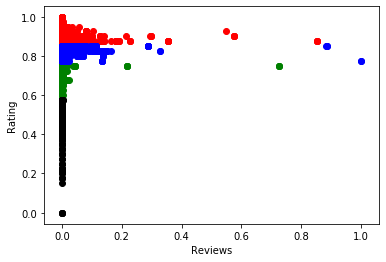

In [37]:
G1 = G[G.cluster==0]
G2 = G[G.cluster==1]
G3 = G[G.cluster==2]
G4 = G[G.cluster==3]

plt.scatter(G1.Reviews,G1['Rating'],color='green')
plt.scatter(G2.Reviews,G2['Rating'],color='red')
plt.scatter(G3.Reviews,G3['Rating'],color='black')
plt.scatter(G4.Reviews,G4['Rating'],color='blue')
plt.xlabel('Reviews')
plt.ylabel('Rating')
#plt.legend()

In [20]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(G[['Reviews','Rating']])
    sse.append(km.inertia_)

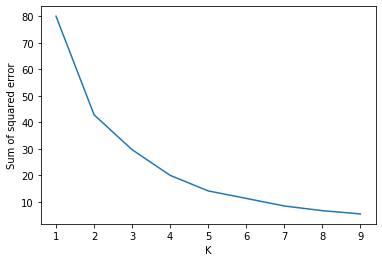

In [21]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)